In [1]:
%pylab inline
#import matplotlib as plt
#import numpy as np
import pandas as pd
import uncertainties
from uncertainties import unumpy as unp
from uncertainties import ufloat

def gaussian(x, mu, sigma, B, A):
    return A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B

def gausfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, mu, sigma, B, A: A * np.e ** ((-1 * (x - mu) ** 2) / (2 * sigma ** 2)) + B,
                  p0=p0)

def lorentz(x, x_0, gamma, a, d):
    return a * 1/(1 + ((x - x_0)/gamma)**2) + d
def lorentzfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, x_0, gamma, a, d: a * 1/(1 + ((x - x_0)/gamma)**2) + d,p0=p0)

def line(x,a,b):
    from numpy import array as array
    return a * array(x) + b

def linfit_pm(x, y, p0=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0)


def fit_pm(x, y, func=lambda x: x, p0=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2


def val(x):
    from uncertainties import unumpy
    try:
        return unumpy.nominal_values(x)
    except TypeError:
        return x


def err(x):
    from uncertainties import unumpy
    return unumpy.std_devs(x)

def expfit_pm(x, y, p0=None):
    import numpy as np
    return fit_pm(x, y, func=lambda x, a, b, c,d: a * np.exp(b * (x-d)) + c, p0=p0)
def expf( x, a, b, c,d):
    return a * np.exp(b *( x-d)) + c

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read(filename):
    from numpy import array as array
    df = pd.read_csv(filename,skiprows=7,names=["Time","Winkel","Pyro","Sample","Wellenlänge","Energie"],sep="\t")
    data = [[],[],[],[],[],[]]

    for i in range(6):
        for k in range(len(df.iloc[0:,i])):
            data[i].append((df.iloc[k,i].replace(",",".")))
    for i in range(len(data)):
        for k in range(len(data[i])):
            try:
                #print(i,k, data[i][k])
                data[i][k] = float(data[i][k])
            except ValueError:
                data[i][k] = 0
    for i in range(len(data)):
        data[i]= array(data[i])
    return data

In [3]:
data1 = read("Bandlücke2-Si1.txt")
data2 = read("Bandlücke2-Si2.txt")
lamp = read("Bandlücke2_Si_Lamp.txt")
ohne_gitter = read("Bandlücke2_Si_Ground.txt")
pappe = read("Bandlücke2_Si_Ground2.txt")
[zeit,winkel,pyro,sample,wellenlänge,energie] = range(6)

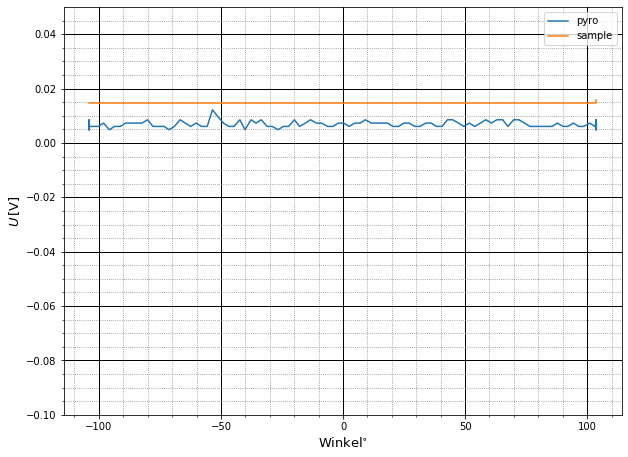

In [4]:

#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(ohne_gitter[winkel], ohne_gitter[pyro], label="pyro")
plt.plot(ohne_gitter[winkel],ohne_gitter[sample], label="sample")

###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('Hintergrund.png')
plt.show()

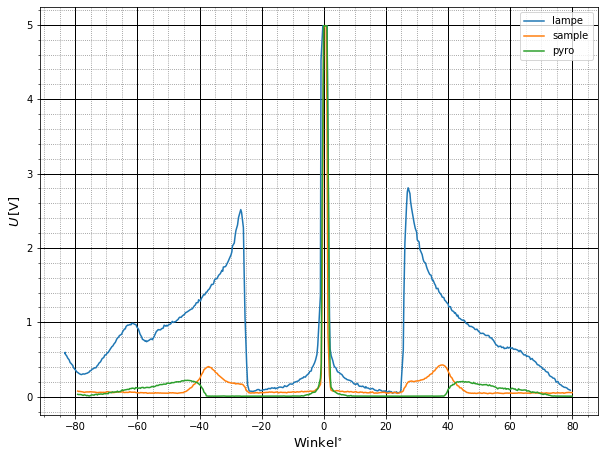

In [5]:

#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(lamp[winkel],lamp[pyro], label="lampe")
plt.plot(data1[winkel],data1[sample], label="sample")
plt.plot(data1[winkel],data1[pyro], label="pyro")


###   Label / Title

plt.ylabel(r'$U\,[\mathrm{V}]$', fontsize=13)
plt.xlabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
#axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('peak_first_single.png')
plt.show()

In [6]:
len(ohne_gitter[pyro])

156

In [7]:
len(lamp[pyro])-len(data1[sample])

25

In [8]:
data1[winkel][-1]

80.0045355548

In [9]:
def inter(y,slope, offset):
    return(y -offset)/slope
def inter2(slope1, offset1, slope2, offset2):
    return(offset2-offset1)/(slope1-slope2)

In [10]:
lamp_corr1= np.concatenate([lamp[pyro][18:230],lamp[pyro][237:]])
lamp_winkel= np.concatenate([lamp[winkel][18:230],lamp[winkel][237:]])


trans_corr1 = (data1[pyro]-mean(ohne_gitter[pyro]))/lamp_corr1

abs_corr1 = (data1[sample]-mean(ohne_gitter[sample]))/lamp_corr1

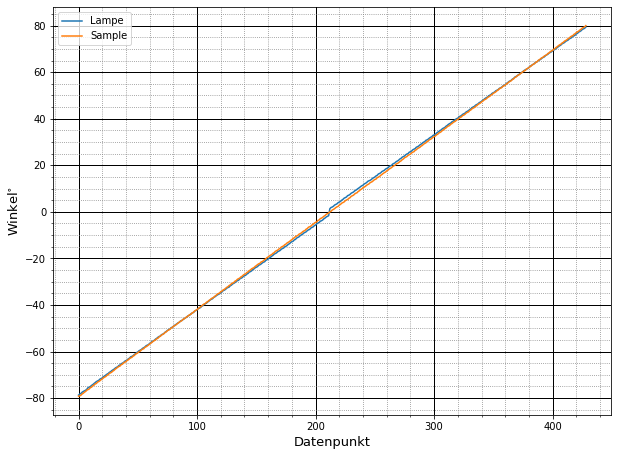

In [11]:

#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(lamp_winkel, label="Lampe")
plt.plot(data1[winkel], label="Sample")


###   Label / Title

plt.xlabel(r'Datenpunkt', fontsize=13)
plt.ylabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
#axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('korrektur_channels.png')
plt.show()

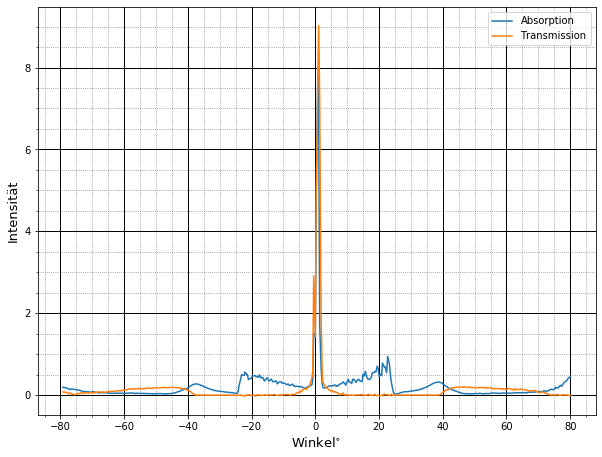

In [15]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(data1[winkel],abs_corr1, label="Absorption")
plt.plot(data1[winkel],trans_corr1, label="Transmission")


###   Label / Title

plt.ylabel(r'Intensität', fontsize=13)
plt.xlabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
#axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('normalized.png')
plt.show()

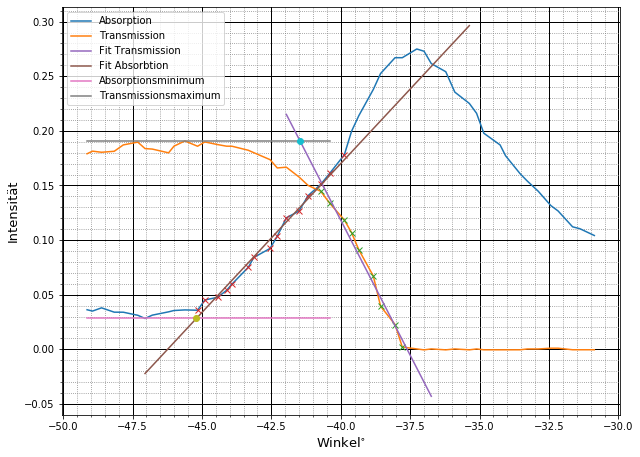

In [24]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

start1,stop1 = 100,115
start2, stop2= 91,106
plt.plot(data1[winkel][80:130],abs_corr1[80:130], label="Absorption")
plt.plot(data1[winkel][80:130],trans_corr1[80:130], label="Transmission")
plt.plot(data1[winkel][103:112],trans_corr1[103:112],"x")
plt.plot(data1[winkel][start2:stop2],abs_corr1[start2:stop2],"x")

fit_trans_11,err_trans_11 = linfit_pm(data1[winkel][103:112],trans_corr1[103:112])
fit_abs_11,err_abs_11 = linfit_pm(data1[winkel][start2:stop2],abs_corr1[start2:stop2])

plt.plot(data1[winkel][100:115],
         line(data1[winkel][100:115],*val(fit_trans_11)),label="Fit Transmission")
extra = 12
plt.plot(data1[winkel][start2-5:stop2+extra],
         line(data1[winkel][start2-5:stop2+extra],*val(fit_abs_11)),label="Fit Absorbtion")

plt.plot(data1[winkel][80:start1+5], np.ones(len(abs_corr1[80:start1+5]))*min(abs_corr1[80:start1+5]),
         label = "Absorptionsminimum")

plt.plot(data1[winkel][80:start1+5], np.ones(len(trans_corr1[80:start1+5]))*max(trans_corr1[80:start1+5]),
         label="Transmissionsmaximum")

hor_abs_11 = min(abs_corr1[80:start1+5])
hor_trans_11 = max(trans_corr1[80:start1+5])

abs_1 = inter(min(abs_corr1[80:start1+5]),*(fit_abs_11))
trans_1 =inter(max(trans_corr1[80:start1+5]),*(fit_trans_11))
#beide_1 = inter2(*val(fit_abs_11),*val(fit_trans_11))

plt.plot(val(abs_1),   line(val(abs_1),  *val(fit_abs_11)),"o") # abs
plt.plot(val(trans_1), line(val(trans_1),*val(fit_trans_11)),"o") #trans
#plt.plot(beide_1, line(beide_1,*val(fit_trans_11)),"o") #beide



###   Errors / Fit / Plot
###   Label / Title

plt.ylabel(r'Intensität', fontsize=13)
plt.xlabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
#axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('si_1_l.png')
plt.show()

In [17]:
print(abs_1)
print(trans_1)

-45.2+/-1.7
-41.5+/-3.0


In [18]:
line(val(abs_1),  *(energie_1))

NameError: name 'energie_1' is not defined

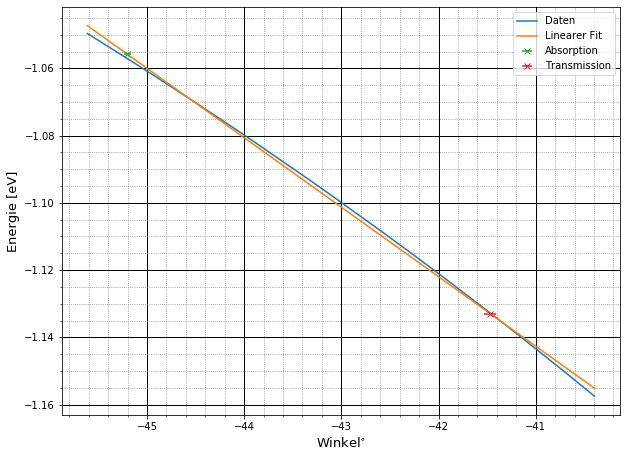

In [19]:

start,stop = 90,105

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

energie_1, energie_1_err = linfit_pm(data1[winkel][start:stop],data1[energie][start:stop])

e_abs_11 = line((abs_1),  *(energie_1))
e_trans_11 = line((trans_1),  *(energie_1))

plt.plot(data1[winkel][start:stop],data1[energie][start:stop], label="Daten")
plt.plot(data1[winkel][start:stop], line(data1[winkel][start:stop],*val(energie_1)), label="Linearer Fit")
plt.errorbar(val(abs_1),val(e_abs_11),xerr=err(e_abs_11), fmt="x", label="Absorption") # abs
plt.errorbar(val(trans_1), val(e_trans_11),xerr=err(e_trans_11),fmt="x", label="Transmission") #trans
###   Errors / Fit / Plot
###   Label / Title

plt.ylabel(r'Energie [eV]', fontsize=13)
plt.xlabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
#axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('si_1_l_energie.png')
plt.show()

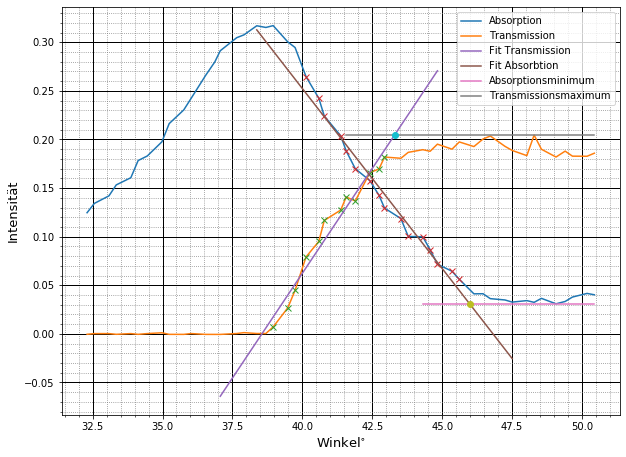

In [25]:
#nice plot
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
start,stop = 300,350
start1,stop1 = 318,330
start2, stop2= 321,337
plt.plot(data1[winkel][start:stop],abs_corr1[start:stop], label="Absorption")
plt.plot(data1[winkel][start:stop],trans_corr1[start:stop], label="Transmission")
plt.plot(data1[winkel][start1:stop1],trans_corr1[start1:stop1],"x")
plt.plot(data1[winkel][start2:stop2],abs_corr1[start2:stop2],"x")

fit_trans_12,err_trans_11 = linfit_pm(data1[winkel][start1:stop1],trans_corr1[start1:stop1])
fit_abs_12,err_abs_11 = linfit_pm(data1[winkel][start2:stop2],abs_corr1[start2:stop2])

plt.plot(data1[winkel][start1-5:stop1+5],
         line(data1[winkel][start1-5:stop1+5],*val(fit_trans_12)),label="Fit Transmission")
extra = 12
plt.plot(data1[winkel][start2-5:stop2+5],
         line(data1[winkel][start2-5:stop2+5],*val(fit_abs_12)),label="Fit Absorbtion")

plt.plot(data1[winkel][stop2-5:stop], np.ones(len(abs_corr1[stop2-5:stop]))*min(abs_corr1[stop2-5:stop]),
         label = "Absorptionsminimum")

plt.plot(data1[winkel][stop1-5:stop], np.ones(len(trans_corr1[stop1-5:stop]))*max(trans_corr1[stop1-5:stop]),
         label="Transmissionsmaximum")

hor_abs_12 = min(abs_corr1[stop2-5:stop])
hor_trans_12 = max(trans_corr1[stop1-5:stop])


abs_2 = inter(min(abs_corr1[stop2-5:stop]),*(fit_abs_12))
trans_2 =inter(max(trans_corr1[stop1-5:stop]),*(fit_trans_12))
#beide_2 = inter2(*(fit_abs_12),*(fit_trans_12))

plt.plot(val(abs_2),   line(val(abs_2),  *val(fit_abs_12)),"o") # abs
plt.plot(val(trans_2), line(val(trans_2),*val(fit_trans_12)),"o") #trans
#plt.plot(val(beide_2), line(val(beide_2),*val(fit_trans_12)),"o") #beide


###   Errors / Fit / Plot
###   Label / Title

plt.ylabel(r'Intensität', fontsize=13)
plt.xlabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
#axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('si_1_r.png')
plt.show()

In [21]:
print(abs_2)
print(trans_2)

46.0+/-2.5
43+/-4


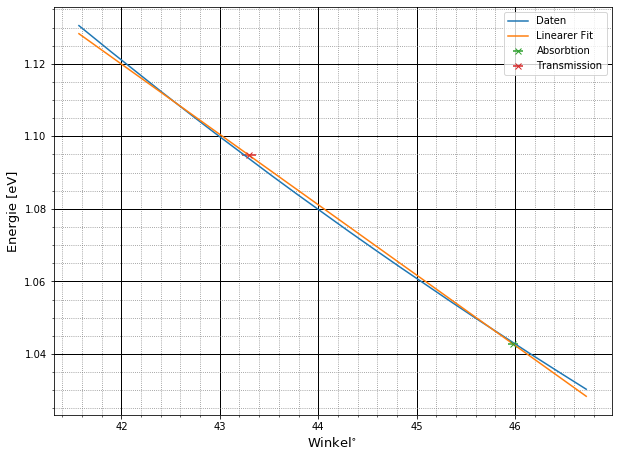

In [22]:

start,stop = 325,340

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

energie_2, energie_2_err = linfit_pm(data1[winkel][start:stop],data1[energie][start:stop])

e_abs_12 = line((abs_2),  *(energie_2))
e_trans_12 = line((trans_2),  *(energie_2))

plt.plot(data1[winkel][start:stop],data1[energie][start:stop], label="Daten")
plt.plot(data1[winkel][start:stop], line(data1[winkel][start:stop],*val(energie_2)), label="Linearer Fit")
plt.errorbar(val(abs_2),val(e_abs_12), xerr=err(e_abs_12), fmt="x", label="Absorbtion") # abs
plt.errorbar(val(trans_2), val(e_trans_12),xerr=err(e_trans_12),fmt="x", label="Transmission") #trans
###   Errors / Fit / Plot
###   Label / Title

plt.ylabel(r'Energie [eV]', fontsize=13)
plt.xlabel(r'Winkel$^{\circ}$', fontsize=13)
#plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([-5,5])
#axes.set_ylim([-0.1,0.05])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('si_1_l_energie.png')
plt.show()

In [32]:
geraden = [
 fit_abs_11,
 fit_trans_11,
 fit_abs_12,
 fit_trans_12,]
horizontalen  =[ hor_abs_11, hor_trans_11, hor_abs_12, hor_trans_12]

schnittwinkel=[ abs_1, trans_1, abs_2, trans_2]

energien=[ e_abs_11, e_trans_11, e_abs_12, e_trans_12]




df = pd.DataFrame(np.transpose([geraden,horizontalen,schnittwinkel, energien]),
                  columns=["Steigung und Offset der Geraden","Position der Horizontalen",
                           "Schnittwinkel der Horizontalen und Geraden", "Energien der Schnittpunkte"],
                 index=["1. Absorbtion", "1. Transmission", "2. Absorbtion", "2. Transmission"])
df
print(df.to_latex())

\begin{tabular}{lllll}
\toprule
{} &   Steigung und Offset der Geraden & Position der Horizontalen & Schnittwinkel der Horizontalen und Geraden & Energien der Schnittpunkte \\
\midrule
1. Absorbtion   &  [0.0273+/-0.0008, 1.261+/-0.033] &                 0.0281946 &                                -45.2+/-1.7 &               -1.06+/-0.04 \\
1. Transmission &  [-0.0494+/-0.0026, -1.86+/-0.10] &                  0.190734 &                                -41.5+/-3.0 &               -1.13+/-0.06 \\
2. Absorbtion   &   [-0.0370+/-0.0015, 1.73+/-0.06] &                 0.0309053 &                                 46.0+/-2.5 &                1.04+/-0.05 \\
2. Transmission &   [0.0431+/-0.0026, -1.66+/-0.11] &                  0.204556 &                                     43+/-4 &                1.09+/-0.07 \\
\bottomrule
\end{tabular}

